# Assignment 2 Q1


##Section A
JPEG (Joint Photographic Experts Group) focuses on compressing digital images using the Discrete Cosine Transform (DCT), which we will primarily discuss in Question 3. The principle behind JPEG compression is to achieve high compression while minimizing the loss of image quality. The user can control the quality using two main parameters: the **Quality Factor** and the **Quantization Parameter**, which will be detailed later in this section.

The tradeoff involved in adjusting these parameters allows JPEG to balance between the desired compression rate and image quality. In other words, strong compression results in a smaller file size but reduces resolution quality, while weak compression preserves resolution quality (and can even be lossless) but results in a larger file size due to retaining more information.

One of the advantages of this compression format is that it is not dependent on specific image types and has relatively low computational complexity. In Ofer's lecture, we saw how the compression ratio affects image quality, although it depends on the specific image.  The following table was introduced to us:

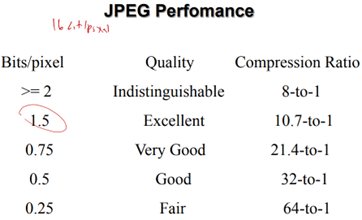

It can be seen that approximately, a ratio above **0.5** is considered good.  

Additionally, JPEG offers different compression modes, such as **Sequential Compression, Progressive Compression, and Lossless Compression**. Below is a brief explanation of each:  

- **Sequential Compression** – Encodes the entire image in a single scan.

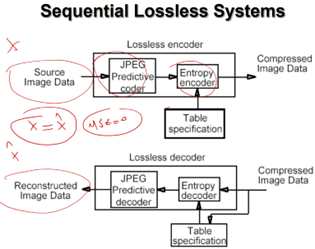

- **Progressive Compression** – Allows the image to be displayed with gradually improving quality as more data is loaded.

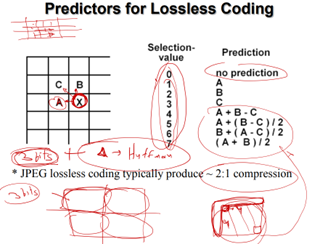

- **Lossless Compression** – Compression without any loss of data, used to preserve all image details exactly without any changes.  

Additionally, one of the common operational modes in JPEG is the Hierarchical Mode, which describes a process where an image is compressed in multiple stages, with each stage generating a version of the image at a lower resolution than the previous one.  

This format allows users to view the image even while it is still downloading, providing a lower-resolution preview while the full data has not yet been fully loaded. This is particularly useful in scenarios where quick image display is needed, such as browsing the web or dealing with a slow internet connection.  

A real-life example: when you try to watch a YouTube video while connected to the university’s WiFi in Building 35 😅.

In general, the process begins at the lowest resolution level. The first stage is encoded using one of JPEG's standard compression modes. Then the output of the first stage serves as a base for encoding the next stage at a higher resolution. This process is repeated until the full image is reconstructed at its maximum resolution.  

Using Hierarchical Mode provides flexibility in image usage and data transmission management. It allows adjusting the level of detail according to different needs without requiring the full-resolution image to be downloaded immediately.  

Side note: If the process were based on wavelets, as in JPEG2000, using the Haar function, you would see that image transmission occurs level by level, from the largest to the smallest components. Each level splits the image into $ 2^{level}$ parts, but this is just an interesting side fact since we're working with JPEG here.

Now, let's detail the **Quality Factor** and **Quantization Parameter**:

- **Quality Factor (QF)** – This parameter controls the level of compression and image quality. A higher QF results in less compression and better image quality, while a lower QF increases compression but reduces image quality.

- **Quantization Parameter (QP)** – This is a matrix used for quantization of the DCT coefficients of an image.  

A classic example from the lecture is the **default quantization matrix**:

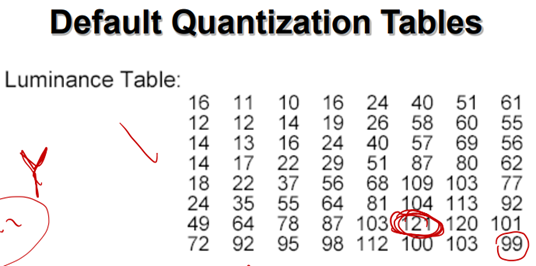

The role of the quantization matrix is to reduce the less important coefficients (which typically describe fine details in the image). Essentially, this matrix enables more efficient compression.  

The QP matrix has a significant impact on both the final image quality and its file size.

##Section B

Mounting

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
drive_path = '/content/gdrive/MyDrive/Multimedia_Compression/HW2/'

Mounted at /content/gdrive


Libraries

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity

Present the bridge image

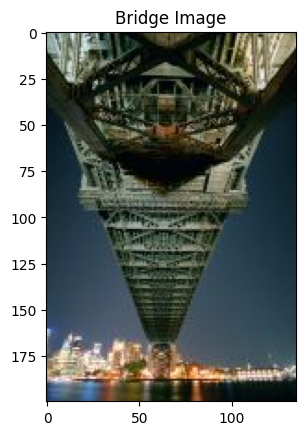

In [ ]:
bridge = cv2.imread(drive_path + 'bridge.jpg')
plt.imshow(cv2.cvtColor(bridge, cv2.COLOR_BGR2RGB))
plt.title('Bridge Image')
plt.show()

Using the opencv functions: cv2.imencode and cv2.imdecode
Perform jpeg compression and jpeg decompression for different QF (Quality Factor) of 20, 60, and 90.

In [ ]:
bridge_20 = cv2.imencode('.jpg', bridge, [cv2.IMWRITE_JPEG_QUALITY, 20])[1]
bridge_60 = cv2.imencode('.jpg', bridge, [cv2.IMWRITE_JPEG_QUALITY, 60])[1]
bridge_90 = cv2.imencode('.jpg', bridge, [cv2.IMWRITE_JPEG_QUALITY, 90])[1]
bridge_20 = cv2.imdecode(bridge_20, cv2.IMREAD_UNCHANGED)
bridge_60 = cv2.imdecode(bridge_60, cv2.IMREAD_UNCHANGED)
bridge_90 = cv2.imdecode(bridge_90, cv2.IMREAD_UNCHANGED)

##Section C

Plot the images after compression

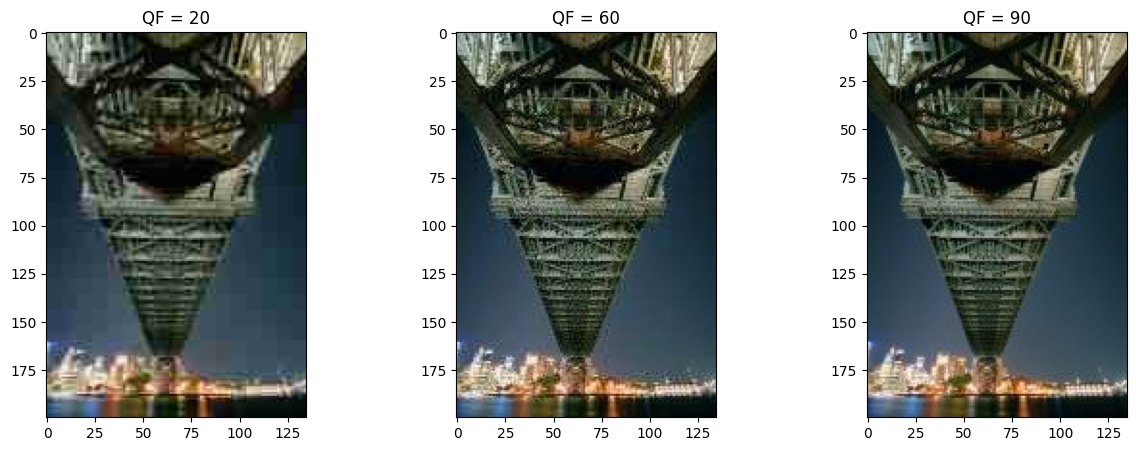

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(bridge_20, cv2.COLOR_BGR2RGB))
plt.title('QF = 20')
plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(bridge_60, cv2.COLOR_BGR2RGB))
plt.title('QF = 60')
plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(bridge_90, cv2.COLOR_BGR2RGB))
plt.title('QF = 90')
plt.show()

Function to calculate MSE, PSNR, SSIM in RGB (3 channels)

In [ ]:
# Calculate MSE and PSNR over all color channels
def calculate_rgb_metrics(original, compressed):
    mse_values = [mean_squared_error(original[:, :, i], compressed[:, :, i]) for i in range(3)]
    psnr_values = [peak_signal_noise_ratio(original[:, :, i], compressed[:, :, i]) for i in range(3)]
    ssim_values = [structural_similarity(original[:, :, i], compressed[:, :, i]) for i in range(3)]

    avg_mse = np.mean(mse_values)
    avg_psnr = np.mean(psnr_values)
    ssim_value = np.mean(ssim_values)
    return avg_mse, avg_psnr, ssim_value

Check the differences according to the following metrics: MSE, PSNR, SSIM


QF = 20: MSE = 183.42193827160494, PSNR = 25.504500653857267, SSIM = 0.8442538408740116


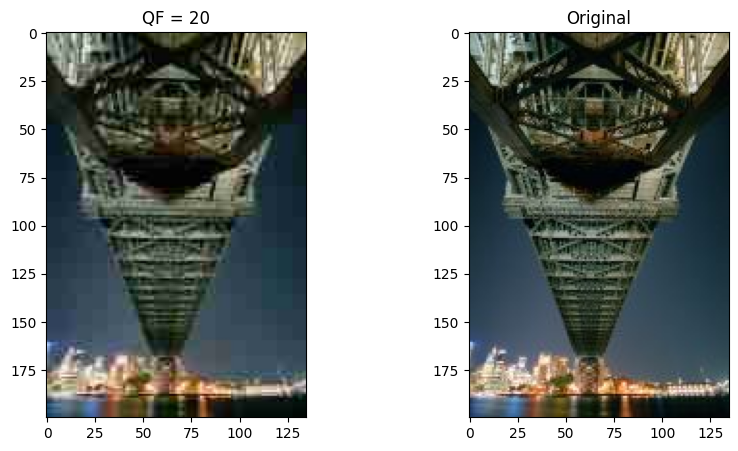


QF = 60: MSE = 83.90572839506173, PSNR = 28.895770448123063, SSIM = 0.9287322483959533


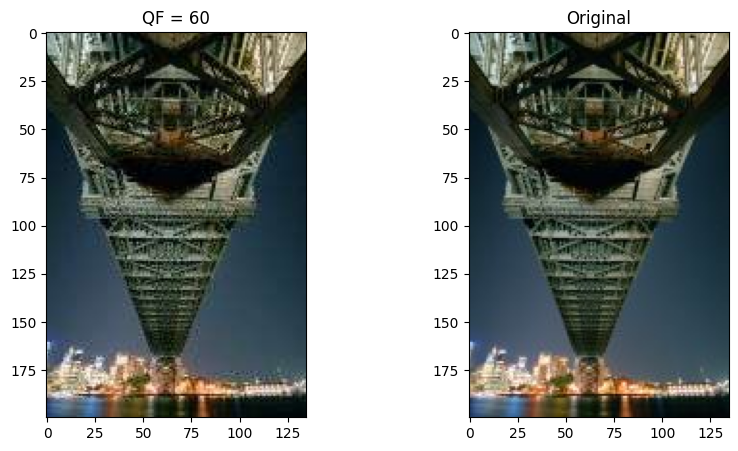


QF = 90: MSE = 1.4561975308641975, PSNR = 46.9720364632985, SSIM = 0.9976907945074709


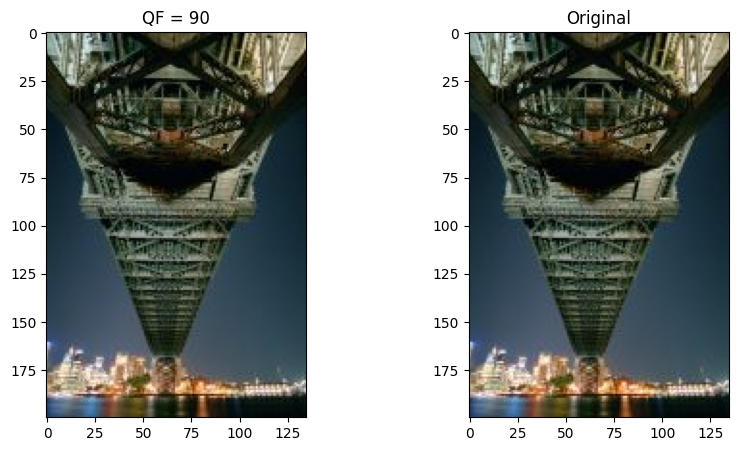

In [ ]:
images_list = [bridge, bridge_20, bridge_60, bridge_90]
titles = ['Original', 'QF = 20', 'QF = 60', 'QF = 90']

for i in range(1,4):
    # Convert BGR to RGB for displaying correctly
    display_image = cv2.cvtColor(images_list[i], cv2.COLOR_BGR2RGB)
    original_rgb = cv2.cvtColor(images_list[0], cv2.COLOR_BGR2RGB)

    mse, psnr, ssim = calculate_rgb_metrics(original_rgb, display_image)
    print(f"\n{titles[i]}: MSE = {mse}, PSNR = {psnr}, SSIM = {ssim}")

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(display_image)
    plt.title(titles[i])
    plt.subplot(1, 2, 2)
    plt.imshow(original_rgb)
    plt.title('Original')
    plt.show()

For **QF = 90**, we can see, as expected, that the **image quality is nearly unaffected**, and the compression has **minimal impact** on the details. In this setting, the image retains the **highest level of details**.

Notably, in this compression mode:  
✅ There is no significant noise around the buildings with distant lights.  
✅ The number of buildings in the **bottom right corner** is clearly identifiable.

For **QF = 60**, the image quality is **slightly degraded**, and the compression has affected the overall clarity. The image retains most details at a moderate-to-good level.

Notably, in this compression mode:  
❌ There is moderate noise around the buildings with distant lights.  
✅ The number of buildings in the bottom right corner is still identifiable.

For **QF = 20**, the image quality is significantly degraded, and the compression has had a strong impact on the details. Fine details are lost, and even coarser details are moderately to severely affected.

Notably, in this compression mode:  
❌ There is significant and strong noise around the buildings with distant lights.  
❌ The number of buildings in the bottom right corner is not identifiable.

### **Metric Results:**
| **QF** | **MSE** | **PSNR (dB)** | **SSIM** |
|--------|---------|--------------|----------|
| **20** | 183.42  | 25.50        | 0.8443   |
| **60** | 83.91   | 28.90        | 0.9287   |
| **90** | 1.46    | 46.97        | 0.9977   |

### **Analysis of the Results:**
- **MSE (Mean Squared Error)** decreases as QF increases, meaning **less distortion** in higher QF values.
- **PSNR (Peak Signal-to-Noise Ratio)** increases with QF, indicating better quality at higher QF values.
- **SSIM (Structural Similarity Index)** is significantly higher for QF = 90, showing almost no perceptual difference from the original image.

These results confirm that higher QF values result in better image quality with less compression, while lower QF values lead to more aggressive compression and greater quality loss.

Even from a computational perspective (in addition to the visually presented images), it is evident that as the QF value increases, the compression becomes less aggressive, and the image retains its quality with minimal degradation.

### **Review of the Metrics:**

- **MSE (Mean Squared Error)** – Measures the average squared error between the pixels of the original image and the compressed image.  
  - Lower MSE values indicate lower error and better quality.  
  - This metric confirms that as QF increases, the image quality improves, but compression is reduced.

- **PSNR (Peak Signal-to-Noise Ratio)** – Measures the signal-to-noise ratio and is expressed in decibels (dB).  
  - Higher PSNR values indicate better quality.  
  - This metric also shows that as QF increases, the image quality improves, but compression efficiency decreases.

- **SSIM (Structural Similarity Index)** – Measures the visual similarity between two images.  
  - Higher SSIM values (closer to 1) indicate higher similarity and better quality.  
  - Additionally, Ofer mentioned that SSIM is more aligned with human visual perception.  
  - This metric, too, demonstrates that as QF increases, image quality is better preserved, but compression is less efficient.